<a href="https://colab.research.google.com/github/saikrishna0716/linear_regression_from_scratch/blob/main/linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [449]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
np.random.seed(12345)

## Cost Function

```
C = (1/n) * Σ(y_i - ŷ_i)², where ŷ_i = intercept + coeff * x_i
```


### Partial Derivative w.r.t. Intercept

```
dC/dIntercept = (1/n) * Σ 2(y_i - ŷ_i) * d/dIntercept(y_i - ŷ_i)
              = (1/n) * Σ 2(y_i - ŷ_i) * (-1)
              = -(2/n) * Σ(y_i - ŷ_i)
```

### Partial Derivative w.r.t. Coefficient

```
dC/dCoeff = (1/n) * Σ 2(y_i - ŷ_i) * d/dCoeff(y_i - ŷ_i)
          = (1/n) * Σ 2(y_i - ŷ_i) * (-x_i)
          = -(2/n) * Σ(x_i * (y_i - ŷ_i))
```

In [ ]:
def cost_function(intercept, coeff, x_train, y_train):

  y_pred = intercept + coeff * x_train

  return np.sum((y_pred - y_train)**2) / len(x_train)

In [ ]:
def batch_gradient_descent(intercept, coeff, learning_rate, x, y):

  n = len(x)

  y_pred = intercept + coeff * x

  dC_DIntercept = - 2 * np.sum(y - y_pred) / n
  dC_DCoeff = - 2 * np.sum((y - y_pred)*x) / n

  new_intercept = intercept - learning_rate * dC_DIntercept
  new_coeff = coeff - learning_rate * dC_DCoeff

  return new_intercept, new_coeff

In [ ]:
x = np.array([[8],
        [6],
        [5],
        [9],
        [3],
        [8],
        [4],
        [4],
        [6],
        [6]])
y = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [ ]:
x = x[:,0]
# y = x*2 + 5
# y = x*2 + 5 + [np.random.randint(-2,2) for _ in range(len(x))]

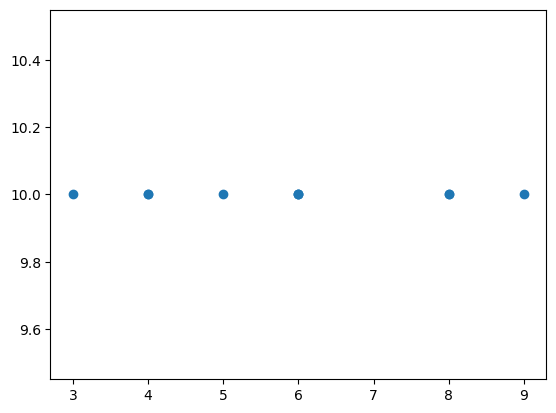

In [ ]:
plt.scatter(x,y)

In [ ]:
cost_function(0, 0, x, y)

np.float64(100.0)

In [ ]:
batch_gradient_descent(0, 0, 0.01, x, y)

(np.float64(0.2), np.float64(1.18))

In [ ]:
intercept = 0
coeff = 0

learning_rate = 0.01
iterations = 1000

costs = []
variables = []

for iter in range(iterations):

  cost = cost_function(intercept, coeff, x, y)

  variables.append((round(intercept,2), round(coeff,2)))
  costs.append(round(cost,3))

  intercept, coeff = batch_gradient_descent(intercept, coeff, learning_rate, x, y)

  new_cost = cost_function(intercept, coeff, x, y)

  if round(abs(new_cost - cost),4) < 0.0001:
    print(f'Stopping at {iter} iteration')
    best_intercept, best_coeff = intercept, coeff
    break

In [ ]:
costs[0], costs[-1]

(np.float64(235.9), np.float64(0.985))

Text(0.5, 1.0, 'Cost function over iterations')

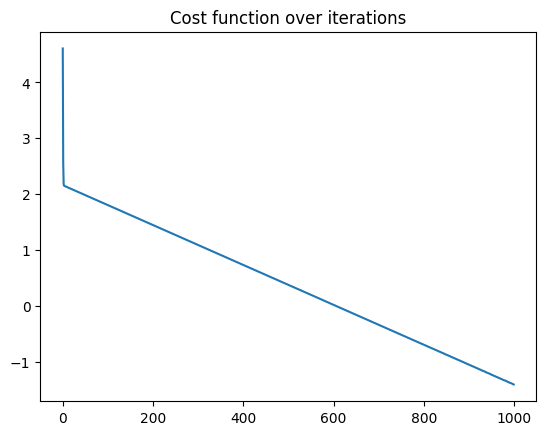

In [ ]:
plt.plot(np.log(costs))
plt.title("Cost function over iterations")

In [ ]:
best_intercept, best_coeff

(np.float64(3.6588978180867504), np.float64(2.2680875406091827))

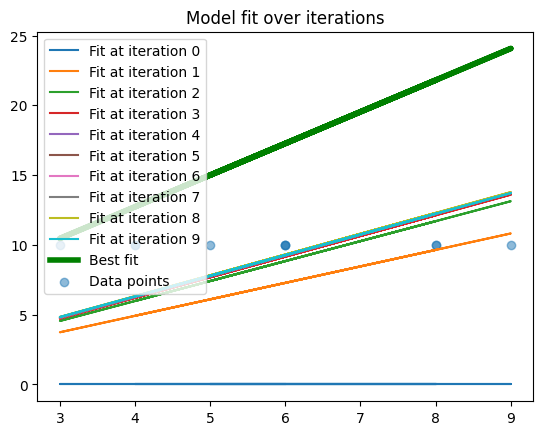

In [ ]:
for idx in range(10):

  iter = idx
  interm_intercept, interm_coeff = variables[iter][0], variables[iter][1]
  plt.plot(x, interm_intercept + interm_coeff * x, label=f'Fit at iteration {iter}')

plt.plot(x, best_intercept + best_coeff * x, linewidth=4, label='Best fit',color='green')
plt.scatter(x, y, alpha=0.5, label='Data points')
plt.title('Model fit over iterations')
plt.legend()

## Actual Implementation - Brining everything together

In [436]:
def cost_function(intercept, coeff, x_train, y_train):

  y_pred = np.sum(x_train * coeff,axis=1)+intercept

  return np.sum((y_pred - y_train)**2) / len(x_train)

def batch_gradient_descent(intercept, coeff, learning_rate, x_train, y_train):

  n = len(x_train)

  y_pred = np.sum(x_train * coeff, axis=1)+intercept

  dC_DIntercept = - 2 * np.sum(y_train - y_pred) / n

  intercept = intercept - learning_rate * dC_DIntercept

  residuals = (y_train - y_pred).reshape(-1,1)
  dC_Dcoeff = -2 * np.sum(x_train * residuals, axis=0)/n

  max_gradient = 10.0

  dC_Dcoeff = np.clip(dC_Dcoeff, -max_gradient, max_gradient)

  coeff = coeff - learning_rate * dC_Dcoeff

  return intercept, coeff

class LinearRegressionSelf:

  def __init__(self):
    self.coeff = None
    self.intercept = None
    self.num_features = None
    self.num_samples = None
    self.costs = None
    self.scale_features = None
    self.mean = None
    self.std = None

  def fit(self, x_train, y_train, learning_rate = 0.01, num_iterations = 2000, tolerance = 0.00001, scale_features = False, decay_rate = 0.95):

    original_lr = learning_rate

    self.x_train_actual = x_train
    self.y_train = y_train
    self.learning_rate = learning_rate
    self.num_iterations = num_iterations
    self.scale_features = scale_features

    if scale_features:
      # self.scale_factor = (np.max(self.x_train_actual, axis = 0) - np.min(self.x_train_actual, axis = 0))
      # self.scale_factor = np.where(self.scale_factor == 0, 1, self.scale_factor)
      # self.x_train = np.round(self.x_train_actual / self.scale_factor, 4)

      self.mean = np.mean(self.x_train_actual, axis=0)
      self.std = np.std(self.x_train_actual, axis=0)
      self.std = np.where(self.std == 0, 1, self.std)  # Handle zero variance
      self.x_train = (self.x_train_actual - self.mean) / self.std

    else:
      self.x_train = self.x_train_actual

    self.num_features = len(x_train[0])
    self.num_samples = len(x_train)

    self.coeff = np.random.normal(0, np.sqrt(2.0 / self.num_features), size=self.num_features)
    self.intercept = 0.1

    cost = cost_function(self.intercept, self.coeff, self.x_train, self.y_train)

    print(f'No. of features: {self.num_features}')
    print(f'No. of samples: {self.num_samples}')
    print(f'Starting Cost: {round(cost,2)}')
    print(f'Starting intercept: {round(self.intercept,2)}')
    print(f'Starting Coeff: {np.round(self.coeff,2)}')

    self.costs = []

    print('\nFitting the Model')

    for iter in range(self.num_iterations):

      cost = cost_function(self.intercept, self.coeff, self.x_train, self.y_train)
      self.costs.append(round(cost,3))

      self.intercept, self.coeff = batch_gradient_descent(self.intercept, self.coeff, self.learning_rate, self.x_train, self.y_train)

      new_cost = cost_function(self.intercept, self.coeff, self.x_train, self.y_train)

      if new_cost > cost:
        self.learning_rate *= decay_rate
      else:
        self.learning_rate = min(self.learning_rate * 1.01, original_lr)

      if abs(new_cost - cost) < tolerance:
        print(f'Stopping at {iter} iteration')
        break

    print('\nCompleted Fitting the Model')
    print(f'Best Cost: {round(self.costs[-1],2)}')
    print(f'Best intercept: {round(self.intercept,2)}')
    print(f'Best Coeff: {self.coeff}')


  def predict(self, x_test):

    if self.scale_features:
      # x_test_scaled = x_test / self.scale_factor
      x_test_scaled = (x_test - self.mean) / self.std

      y_pred = np.sum(x_test_scaled * self.coeff, axis = 1) + self.intercept
    else:
      y_pred = np.sum(x_test * self.coeff, axis = 1) + self.intercept

    return y_pred

  def score(self, y_test, y_pred):

    r_squared = 1 - (np.sum((y_pred-y_test)**2) / np.sum((y_test-y_test.mean())**2))
    adj_r_squared = 1 - ((1 - r_squared**2) * (self.num_samples - 1) / (self.num_samples - self.num_features - 1))

    rmse = np.sqrt(np.sum((y_test - y_pred)**2)/len(y_test))
    mae = np.sum(abs(y_test - y_pred))/len(y_test)

    print(f'R_Squared: {round(r_squared,2)}, Adj_R_Squared: {round(adj_r_squared,2)}, RMSE: {round(rmse,2)}, MAE: {round(mae,2)}')
    return

In [ ]:
num_features = 4
num_samples = 10

# x = np.array([[np.random.randint(1,10) for i in range(num_features)] for _ in range(num_samples)])
x = np.array([[np.random.randint(1,10), np.random.randint(500,1000), np.random.randint(200,20000), 150] for _ in range(num_samples)])

weights = np.array([2,3,4,5])

y = np.sum(x * weights, axis = 1) + 5

In [ ]:
x, y

(array([[    7,   574,  2890,   150],
        [    2,   531,  7253,   150],
        [    2,   739,  6249,   150],
        [    2,   979, 16504,   150],
        [    3,   820, 10813,   150],
        [    3,   515,  6355,   150],
        [    2,   715,   836,   150],
        [    7,   963, 10040,   150],
        [    2,   753,  5213,   150],
        [    6,   982, 19313,   150]]),
 array([14051, 31364, 27972, 69712, 46473, 27726,  6248, 43818, 23870,
        80965]))

In [427]:
x_test = np.array([[np.random.randint(1,10), np.random.randint(50,100), np.random.randint(200,300), 150] for _ in range(num_samples)])

y_test = np.sum(x_test * weights, axis = 1) + 5

In [428]:
x_test, y_test

(array([[  6,  72, 229, 150],
        [  9,  98, 267, 150],
        [  6,  68, 284, 150],
        [  7,  54, 247, 150],
        [  7,  73, 247, 150],
        [  2,  88, 211, 150],
        [  3,  70, 223, 150],
        [  7,  61, 249, 150],
        [  3,  51, 215, 150],
        [  4,  76, 227, 150]]),
 array([1899, 2135, 2107, 1919, 1976, 1867, 1863, 1948, 1774, 1899]))

In [437]:
model = LinearRegressionSelf()
model.fit(x, y, learning_rate = 0.01, num_iterations = 1000000, tolerance = 1e-7, scale_features = True)

No. of features: 4
No. of samples: 10
Starting Cost: 1883515365.73
Starting intercept: 0.1
Starting Coeff: [0.72 1.11 0.67 0.79]

Fitting the Model
Stopping at 220808 iteration

Completed Fitting the Model
Best Cost: 0.0
Best intercept: 37219.9
Best Coeff: [4.11800456e+00 5.12246556e+02 2.19425112e+04 7.93603674e-01]


In [438]:
model.x_train

array([[ 1.65118597, -1.07234401, -1.0311671 ,  0.        ],
       [-0.77702869, -1.32417794, -0.23581617,  0.        ],
       [-0.77702869, -0.10600451, -0.41883986,  0.        ],
       [-0.77702869,  1.29958021,  1.4505903 ,  0.        ],
       [-0.29138576,  0.36838033,  0.41315227,  0.        ],
       [-0.29138576, -1.41788359, -0.39951664,  0.        ],
       [-0.77702869, -0.24656299, -1.40560002,  0.        ],
       [ 1.65118597,  1.20587456,  0.27223862,  0.        ],
       [-0.77702869, -0.02401207, -0.60769696,  0.        ],
       [ 1.16554303,  1.31715002,  1.96265557,  0.        ]])

In [440]:
y_pred = model.predict(x_test)
y_pred

array([1898.98906489, 2134.98931828, 2106.98892443, 1918.98848613,
       1975.9889558 , 1866.9899548 , 1862.98938058, 1947.98865766,
       1773.98891696, 1898.98940568])

In [441]:
model.score(y_pred, y_test)

R_Squared: 1.0, Adj_R_Squared: 1.0, RMSE: 0.01, MAE: 0.01


Text(0.5, 1.0, 'Cost (Squared error) reduction over iterations')

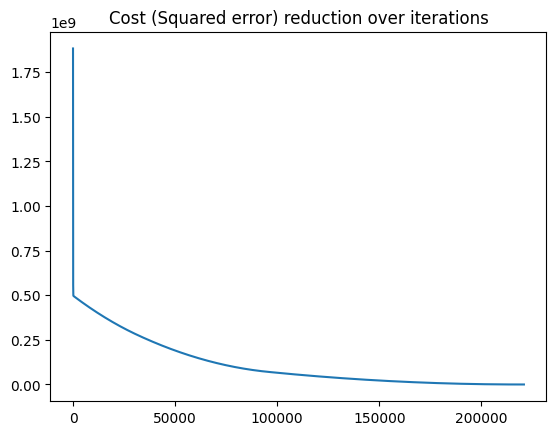

In [444]:
plt.plot(model.costs)
# plt.plot(np.log(model.costs))
plt.title("Cost (Squared error) reduction over iterations")

In [445]:
from sklearn.linear_model import LinearRegression

In [470]:
x,y

(array([[    7,   574,  2890,   150],
        [    2,   531,  7253,   150],
        [    2,   739,  6249,   150],
        [    2,   979, 16504,   150],
        [    3,   820, 10813,   150],
        [    3,   515,  6355,   150],
        [    2,   715,   836,   150],
        [    7,   963, 10040,   150],
        [    2,   753,  5213,   150],
        [    6,   982, 19313,   150]]),
 array([14051, 31364, 27972, 69712, 46473, 27726,  6248, 43818, 23870,
        80965]))

In [447]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)

In [448]:
reg.coef_, reg.intercept_

(array([2., 3., 4., 0.]), np.float64(755.0000000000509))

In [475]:
x_test = np.array([[np.random.randint(1,10), np.random.randint(1,10), np.random.randint(1,10)] for _ in range(5)])
weights = np.array([2,3,4])
y_test = np.sum(x_test * weights, axis = 1) + 5

In [476]:
x_test

array([[3, 7, 3],
       [3, 7, 2],
       [6, 1, 3],
       [5, 4, 9],
       [3, 9, 8]])

## Closed form solution

```
β = (X^T X)^(-1) X^T y
```

1.   Very expensive to do compute matrix calculations, if the dataset is large
2.   No need to worry about learning rate etc




In [488]:
def closed_form_solution(x,y):

  x_stack = np.column_stack([np.ones(len(x)), x]) ## Adding intercept to input data

  vars = np.linalg.inv(x_stack.T @ x_stack) @ x_stack.T @ y

  coeff = vars[1:]
  intercept = vars[0]

  return coeff, intercept

In [490]:
closed_form_solution(x_test,y_test)

(array([2., 3., 4.]), np.float64(4.999999999987011))